# Movie Classification Modeling with Polynomial Features

### Import Libraries & Load Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, plot_confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

import time

# importing warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

pd.set_option("display.max_rows",None,"display.max_columns",None)

In [42]:
df = pd.read_csv('./data/df_model.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
print(df.shape)
df.head()

(6587, 3027)


review_type  runtime  tomatometer_status  tomatometer_rating  \
0            1    119.0                   0                49.0   
1            1     90.0                   1                87.0   
2            1    122.0                   1                67.0   
3            1     80.0                   1                96.0   
4            0    143.0                   0                25.0   

   tomatometer_count  audience_status  audience_rating  audience_count  \
0              149.0                0             53.0        254421.0   
1              142.0                1             64.0         11574.0   
2               24.0                0             53.0         14684.0   
3               51.0                1             86.0         23890.0   
4               83.0                1             64.0         25944.0   

   critic_id  review_score  year  imdb_score  imdb_count  review_negative  \
0       1022          70.0  2010        59.0    174198.0            0.080   
1       3177          75.0  2010        66.0     10928.0            0.000   
2       8874          80.0  1979        61.0     14946.0            0.486   
3       7127         100.0  1935        76.0     50519.0            0.000   
4       8167          50.0  2005        51.0       249.0            0.199   

   review_neutral  review_positive  review_compound  consensus_negative  \
0           0.727            0.193           0.7050               0.000   
1           0.928            0.072           0.4767               0.000   
2           0.332            0.182          -0.8126               0.262   
3           1.000            0.000           0.0000               0.000   
4           0.709            0.092          -0.3498               0.171   

   consensus_neutral  consensus_positive  consensus_compound  score  G  NR  \
0              0.590               0.410              0.9274  53.95  0   0   
1              0.885               0.115              0.5023  73.53  0   0   
2              0.547               0.191             -0.4676  60.03  0   0   
3              0.950               0.050              0.0258  85.58  0   1   
4              0.692               0.137             -0.2263  49.41  0   0   

   PG  PG-13  R  000  10  11  12  15  1950s  1960s  1970s  1980s  20  aaron  \
0   1      0  0    0   0   0   0   0      0      0      0      0   0      0   
1   0      0  1    0   0   0   0   0      0      0      0      0   0      0   
2   0      0  1    0   2   0   0   0      0      0      0      0   0      0   
3   0      0  0    0   0   0   0   0      0      0      0      0   0      0   
4   0      0  1    0   0   0   0   0      0      0      0      0   0      0   

   abandoned  abigail  ability  able  abraham  absorbing  accident  \
0          0        0        0     0        0          0         0   
1          0        0        0     0        0          0         0   
2          0        0        0     0        0          0         0   
3          0        0        0     0        0          0         0   
4          0        0        0     0        0          0         0   

   accidentally  accused  achieve  act  acted  acting  action  actor  actors  \
0             0        0        0    0      0       0       1      0       0   
1             0        0        0    0      0       0       0      0       0   
2             0        0        0    0      0       0       0      0       0   
3             0        1        0    0      0       0       1      0       0   
4             0        0        0    0      0       0       0      0       0   

   actress  actually  adam  adams  adaptation  add  adds  adrian  adrien  \
0        0         0     0      0           0    0     0       0       0   
1        0         0     0      0           0    0     0       0       0   
2        0         0     0      0           0    0     0       1       0   
3        0         0     0      0           0    0     0       0       0   
4        0     

### Setup for Modeling

In [43]:
np.random.seed(321)

In [44]:
X = df.drop(columns = ['audience_rating', 'audience_status', 'audience_count'])
y = df['audience_status']

Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.30, random_state=321)

### Baseline

In [46]:
X_train.isnull().sum()

review_type           0
runtime               0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
critic_id             0
review_score          0
year                  0
imdb_score            0
imdb_count            0
review_negative       0
review_neutral        0
review_positive       0
review_compound       0
consensus_negative    0
consensus_neutral     0
consensus_positive    0
consensus_compound    0
score                 0
G                     0
NR                    0
PG                    0
PG-13                 0
R                     0
000                   0
10                    0
11                    0
12                    0
15                    0
1950s                 0
1960s                 0
1970s                 0
1980s                 0
20                    0
aaron                 0
abandoned             0
abigail               0
ability               0
able                  0
abraham               0
absorbing             0
accident        

In [47]:
y_test.value_counts(normalize=True)

1    0.548306
0    0.451694
Name: audience_status, dtype: float64

### Classification Modeling with Polynomial Features 

In [48]:
X.columns[0:24]

Index(['review_type', 'runtime', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'critic_id', 'review_score', 'year', 'imdb_score',
       'imdb_count', 'review_negative', 'review_neutral', 'review_positive',
       'review_compound', 'consensus_negative', 'consensus_neutral',
       'consensus_positive', 'consensus_compound', 'score', 'G', 'NR', 'PG',
       'PG-13', 'R'],
      dtype='object')

In [49]:
# Fit & Transform polynomial features
features = X.columns[0:24]
poly = PolynomialFeatures(include_bias=False, interaction_only = True, degree = 2)
poly_df = poly.fit_transform(X[features])

In [50]:
# Creating polynomial DataFrame
poly_df = pd.DataFrame(data = poly_df, columns = poly.get_feature_names(features))
poly_df.head()

,review_type,runtime,tomatometer_status,tomatometer_rating,tomatometer_count,critic_id,review_score,year,imdb_score,imdb_count,review_negative,review_neutral,review_positive,review_compound,consensus_negative,consensus_neutral,consensus_positive,consensus_compound,score,G,NR,PG,PG-13,R,review_type runtime,review_type tomatometer_status,review_type tomatometer_rating,review_type tomatometer_count,review_type critic_id,review_type review_score,review_type year,review_type imdb_score,review_type imdb_count,review_type review_negative,review_type review_neutral,review_type review_positive,review_type review_compound,review_type consensus_negative,review_type consensus_neutral,review_type consensus_positive,review_type consensus_compound,review_type score,review_type G,review_type NR,review_type PG,review_type PG-13,review_type R,runtime tomatometer_status,runtime tomatometer_rating,runtime tomatometer_count,runtime critic_id,runtime review_score,runtime year,runtime imdb_score,runtime imdb_count,runtime review_negative,runtime review_neutral,runtime review_positive,runtime review_compound,runtime consensus_negative,runtime consensus_neutral,runtime consensus_positive,runtime consensus_compound,runtime score,runtime G,runtime NR,runtime PG,runtime PG-13,runtime R,tomatometer_status tomatometer_rating,tomatometer_status tomatometer_count,tomatometer_status critic_id,tomatometer_status review_score,tomatometer_status year,tomatometer_status imdb_score,tomatometer_status imdb_count,tomatometer_status review_negative,tomatometer_status review_neutral,tomatometer_status review_positive,tomatometer_status review_compound,tomatometer_status consensus_negative,tomatometer_status consensus_neutral,tomatometer_status consensus_positive,tomatometer_status consensus_compound,tomatometer_status score,tomatometer_status G,tomatometer_status NR,tomatometer_status PG,tomatometer_status PG-13,tomatometer_status R,tomatometer_rating tomatometer_count,tomatometer_rating critic_id,tomatometer_rating review_score,tomatometer_rating year,tomatometer_rating imdb_score,tomatometer_rating imdb_count,tomatometer_rating review_negative,tomatometer_rating review_neutral,tomatometer_rating review_positive,tomatometer_rating review_compound,tomatometer_rating consensus_negative,tomatometer_rating consensus_neutral,tomatometer_rating consensus_positive,tomatometer_rating consensus_compound,tomatometer_rating score,tomatometer_rating G,tomatometer_rating NR,tomatometer_rating PG,tomatometer_rating PG-13,tomatometer_rating R,tomatometer_count critic_id,tomatometer_count review_score,tomatometer_count year,tomatometer_count imdb_score,tomatometer_count imdb_count,tomatometer_count review_negative,tomatometer_count review_neutral,tomatometer_count review_positive,tomatometer_count review_compound,tomatometer_count consensus_negative,tomatometer_count consensus_neutral,tomatometer_count consensus_positive,tomatometer_count consensus_compound,tomatometer_count score,tomatometer_count G,tomatometer_count NR,tomatometer_count PG,tomatometer_count PG-13,tomatometer_count R,critic_id review_score,critic_id year,critic_id imdb_score,critic_id imdb_count,critic_id review_negative,critic_id review_neutral,critic_id review_positive,critic_id review_compound,critic_id consensus_negative,critic_id consensus_neutral,critic_id consensus_positive,critic_id consensus_compound,critic_id score,critic_id G,critic_id NR,critic_id PG,critic_id PG-13,critic_id R,review_score year,review_score imdb_score,review_score imdb_count,review_score review_negative,review_score review_neutral,review_score review_positive,review_score review_compound,review_score consensus_negative,review_score consensus_neutral,review_score consensus_positive,review_score consensus_compound,review_score score,review_score G,review_score NR,review_score PG,review_score PG-13,review_score R,year imdb_score,year imdb_count,year review_negative,year review_neutral,year review_positive,year review_compound,year consens

In [51]:
# Creating a target column for correlation matrix 
poly_df['target'] = df['audience_status']

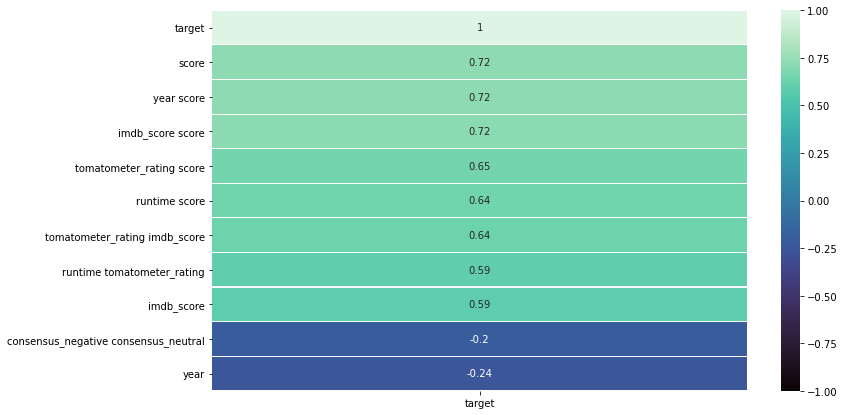

In [52]:
# Adding in target variable to make correlation matrix. 
corr_poly = poly_df.corr()[['target']]
corr_poly = corr_poly.loc[(corr_poly['target'] >= 0.59) | (corr_poly['target'] < -.20)]


plt.figure(figsize = (12,7))
sns.heatmap(data = (corr_poly.sort_values(by = 'target', ascending = False)),
           annot = True,
           linewidths=0.1,
           yticklabels= True,
           xticklabels= True,
           cmap = 'mako',
           vmin=-1,
           vmax=1)
plt.yticks(rotation = 0);
plt.savefig('./images/corr_poly.png')

In [53]:
# Dropping target column
poly_df.drop(columns = 'target', inplace = True)

In [54]:
# Dropping transformed columns
X = X.drop(columns = ['review_type', 'runtime', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'critic_id', 'review_score', 'year', 'imdb_score',
       'imdb_count', 'review_negative', 'review_neutral', 'review_positive',
       'review_compound', 'consensus_negative', 'consensus_neutral',
       'consensus_positive', 'consensus_compound', 'score', 'G', 'NR', 'PG',
       'PG-13', 'R'])

In [55]:
# Merging X and poly df 
X = pd.concat([X, poly_df], axis = 1)

In [56]:
# Resetting target
y = df['audience_status']

### Train Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.30, random_state=321)

### Logistic Regression

In [58]:
count = 0 
lr_poly_params = {}

In [59]:
start = time.time()
lr_poly_params = lr_poly_params  
count = count

lr_poly_pipe = Pipeline([('sc', StandardScaler()),
                   ('lr', LogisticRegression())])

params = {
#     'lr__l1_ratio': [0.1,0.9],
    'lr__tol': [0.1, 0.01, 0.001],
    'lr__C': [2, 1, 0.5],
    'lr__penalty':['l1','l2'],
    'lr__solver': ['saga'],
    'lr__max_iter': [5000]}

gs_lr_poly = GridSearchCV(lr_poly_pipe, param_grid = params, cv = 3, verbose = 1, n_jobs = 4)
gs_lr_poly.fit(X_train, y_train)

count += 1

gs_lr_poly.best_params_['score'] = gs_lr_poly.best_score_ 
gs_lr_poly.best_params_['train_score'] = gs_lr_poly.score(X_train, y_train)
gs_lr_poly.best_params_['test_score'] = gs_lr_poly.score(X_test, y_test)

lr_poly_preds = gs_lr_poly.predict(X_test)

gs_lr_poly.best_params_['recall']  = recall_score(y_test, lr_poly_preds)
gs_lr_poly.best_params_['precision'] = precision_score(y_test, lr_poly_preds)
gs_lr_poly.best_params_['f1_score'] = f1_score(y_test, lr_poly_preds)

lr_poly_params[f'lr_poly_{count}'] = gs_lr_poly.best_params_   

lr_poly_df = pd.DataFrame.from_dict(lr_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

lr_poly_df

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 255.16532039642334


,lr__C,lr__max_iter,lr__penalty,lr__solver,lr__tol,score,train_score,test_score,recall,precision,f1_score
lr_poly_1,2,5000,l2,saga,0.1,0.824948,0.93167,0.853819,0.834871,0.891626,0.862315


### KNN

In [60]:
count = 0 
knn_poly_params = {}

In [61]:
start = time.time()
knn_poly_params = knn_poly_params  
count = count
knn_poly_pipe = Pipeline([('sc', StandardScaler()),
                   ('knn', KNeighborsClassifier())])

params = {
    'knn__n_neighbors' : np.arange(1, 20, 2),
    'knn__leaf_size' : [4,7,10,15],
    'knn__metric' : ['euclidean', 'minkowski','manhattan']
}

gs_knn_poly = GridSearchCV(knn_poly_pipe, param_grid = params, cv = 3,verbose = 1, n_jobs = 4)

gs_knn_poly.fit(X_train, y_train)

count += 1

gs_knn_poly.best_params_['score'] = gs_knn_poly.best_score_ 
gs_knn_poly.best_params_['train_score'] = gs_knn_poly.score(X_train, y_train)
gs_knn_poly.best_params_['test_score'] = gs_knn_poly.score(X_test, y_test)

knn_poly_preds = gs_knn_poly.predict(X_test)

gs_knn_poly.best_params_['recall']  = recall_score(y_test, knn_poly_preds)
gs_knn_poly.best_params_['precision'] = precision_score(y_test, knn_poly_preds)
gs_knn_poly.best_params_['f1_score'] = f1_score(y_test, knn_poly_preds)

knn_poly_params[f'knn_poly_{count}'] = gs_knn_poly.best_params_   

knn_poly_df = pd.DataFrame.from_dict(knn_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')
knn_poly_df

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 1150.9154920578003


,knn__leaf_size,knn__metric,knn__n_neighbors,score,train_score,test_score,recall,precision,f1_score
knn_poly_1,4,manhattan,19,0.74447,0.800651,0.740516,0.619004,0.870298,0.72345


### Bernoulli Naive Bayes 

In [62]:
count = 0 
nb_poly_params = {}

In [63]:
start = time.time()
nb_poly_params = nb_poly_params
count = count

params = {
    'alpha' : [0.1,0.5,1]
}

gs_nb_poly = GridSearchCV(BernoulliNB(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)
gs_nb_poly.fit(X_train, y_train)

count += 1

gs_nb_poly.best_params_['score'] = gs_nb_poly.best_score_ 
gs_nb_poly.best_params_['train_score'] = gs_nb_poly.score(X_train, y_train)
gs_nb_poly.best_params_['test_score'] = gs_nb_poly.score(X_test, y_test)

nb_poly_preds = gs_nb_poly.predict(X_test)

gs_nb_poly.best_params_['recall']  = recall_score(y_test, nb_poly_preds)
gs_nb_poly.best_params_['precision'] = precision_score(y_test, nb_poly_preds)
gs_nb_poly.best_params_['f1_score'] = f1_score(y_test, nb_poly_preds)

nb_poly_params[f'nb_poly_{count}'] = gs_nb_poly.best_params_   

nb_poly_df = pd.DataFrame.from_dict(nb_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

nb_poly_df

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 5.753736972808838


,alpha,score,train_score,test_score,recall,precision,f1_score
nb_poly_1,0.5,0.745987,0.756833,0.751644,0.75369,0.784822,0.768941


### Random Forest

In [64]:
count = 0 
rf_poly_params = {}

In [65]:
start = time.time()
rf_poly_params = rf_poly_params
count = count

params = {
    'n_estimators': [60,70,80],
    'max_depth': [4,5,6],
    'ccp_alpha': [0.001,0.00001,0,1],
    'bootstrap': [True,False],
    'max_features': ['sqrt','log2']}

gs_rf_poly = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = 3, verbose = 1, n_jobs = 4)

gs_rf_poly.fit(X_train, y_train)

count += 1

gs_rf_poly.best_params_['score'] = gs_rf_poly.best_score_ 
gs_rf_poly.best_params_['train_score'] = gs_rf_poly.score(X_train, y_train)
gs_rf_poly.best_params_['test_score'] = gs_rf_poly.score(X_test, y_test)

rf_poly_params[f'rf_poly_{count}'] = gs_rf_poly.best_params_

rf_poly_preds = gs_rf_poly.predict(X_test)

gs_rf_poly.best_params_['recall']  = recall_score(y_test, rf_poly_preds)
gs_rf_poly.best_params_['precision'] = precision_score(y_test, rf_poly_preds)
gs_rf_poly.best_params_['f1_score'] = f1_score(y_test, rf_poly_preds)

rf_poly_df = pd.DataFrame.from_dict(rf_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

rf_poly_df

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Runtime is 105.36245393753052


,bootstrap,ccp_alpha,max_depth,max_features,n_estimators,score,train_score,test_score,recall,precision,f1_score
rf_poly_1,False,0,6,sqrt,70,0.862475,0.895228,0.865959,0.845018,0.904245,0.873629


### Decision Tree

In [66]:
count = 0 
dt_poly_params = {}

In [67]:
start = time.time()
dt_poly_params = dt_poly_params
count = count

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5,7,8],
    'min_samples_split': [20,25],
    'min_samples_leaf': [2, 4, 6],
    'ccp_alpha': [0, 0.01]}

gs_dt_poly = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 3, verbose = 1, n_jobs = 4)

gs_dt_poly.fit(X_train, y_train)

count += 1

gs_dt_poly.best_params_['score'] = gs_dt_poly.best_score_ 
gs_dt_poly.best_params_['train_score'] = gs_dt_poly.score(X_train, y_train)
gs_dt_poly.best_params_['test_score'] = gs_dt_poly.score(X_test, y_test)

dt_poly_params[f'dt_poly_{count}'] = gs_dt_poly.best_params_

dt_poly_preds = gs_dt_poly.predict(X_test)

gs_dt_poly.best_params_['recall']  = recall_score(y_test, dt_poly_preds)
gs_dt_poly.best_params_['precision'] = precision_score(y_test, dt_poly_preds)
gs_dt_poly.best_params_['f1_score'] = f1_score(y_test, dt_poly_preds)

dt_poly_df = pd.DataFrame.from_dict(dt_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

dt_poly_df

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Runtime is 85.01567006111145


,ccp_alpha,criterion,max_depth,min_samples_leaf,min_samples_split,score,train_score,test_score,recall,precision,f1_score
dt_poly_1,0,gini,8,6,20,0.888069,0.932755,0.880121,0.881919,0.897653,0.889716


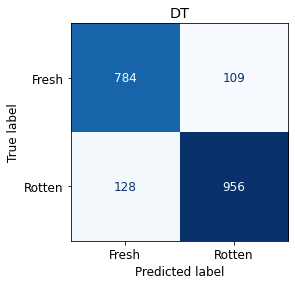

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_poly_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_dt_poly, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('DT');
plt.savefig('./images/dt_poly.png')

In [90]:
print(f'Specificity Rate: {(tn / (tn + fp))}')
print(f'Misclassification: {1 - (gs_dt_poly.score(X_test, y_test))}')

Specificity Rate: 0.8779395296752519
Misclassification: 0.11987860394537175


### SVC

In [74]:
count = 0 
svc_poly_params = {}

In [75]:
start = time.time()
svc_poly_params = svc_poly_params
count = count

svc_poly_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC())
])

params = {
    'svc__C' : np.linspace(1, 20, 20),
    'svc__kernel' : ['poly'],
    'svc__degree' : [2,3],
}

gs_svc_poly = GridSearchCV(svc_poly_pipe, param_grid = params, cv = 3, verbose = 1, n_jobs = 4)
gs_svc_poly.fit(X_train, y_train)

count += 1

gs_svc_poly.best_params_['score'] = gs_svc_poly.best_score_ 
gs_svc_poly.best_params_['train_score'] = gs_svc_poly.score(X_train, y_train)
gs_svc_poly.best_params_['test_score'] = gs_svc_poly.score(X_test, y_test)

svc_poly_preds = gs_svc_poly.predict(X_test)

gs_svc_poly.best_params_['recall']  = recall_score(y_test, svc_poly_preds)
gs_svc_poly.best_params_['precision'] = precision_score(y_test, svc_poly_preds)
gs_svc_poly.best_params_['f1_score'] = f1_score(y_test, svc_poly_preds)

svc_poly_params[f'svc_poly_{count}'] = gs_svc_poly.best_params_   

svc_poly_df = pd.DataFrame.from_dict(svc_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

svc_poly_df

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 1055.4155881404877


,svc__C,svc__degree,svc__kernel,score,train_score,test_score,recall,precision,f1_score
svc_poly_1,3.0,3,poly,0.771153,0.999566,0.779464,0.734317,0.84322,0.78501


### Gradient Boost

In [72]:
count = 0 
gb_poly_params = {}

In [73]:
start = time.time()
gb_poly_params = gb_poly_params
count = count

params  = {
    'learning_rate':[0.25],
    'n_estimators':[300],
    'max_depth':[5]}

gs_gb_poly = GridSearchCV(GradientBoostingClassifier() , param_grid = params, cv = 3, verbose = 1, n_jobs = 4)

gs_gb_poly.fit(X_train, y_train)
count += 1

gs_gb_poly.best_params_['score'] = gs_gb_poly.best_score_ 
gs_gb_poly.best_params_['train_score'] = gs_gb_poly.score(X_train, y_train)
gs_gb_poly.best_params_['test_score'] = gs_gb_poly.score(X_test, y_test)

gb_poly_preds = gs_gb_poly.predict(X_test)

gs_gb_poly.best_params_['recall']  = recall_score(y_test, gb_poly_preds)
gs_gb_poly.best_params_['precision'] = precision_score(y_test, gb_poly_preds)
gs_gb_poly.best_params_['f1_score'] = f1_score(y_test, gb_poly_preds)

gb_poly_params[f'gb_poly_{count}'] = gs_gb_poly.best_params_   

gb_poly_df = pd.DataFrame.from_dict(gb_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

gb_poly_df

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Runtime is 354.0627019405365


,learning_rate,max_depth,n_estimators,score,train_score,test_score,recall,precision,f1_score
gb_poly_1,0.25,5,300,0.916055,1.0,0.928174,0.925277,0.942669,0.933892


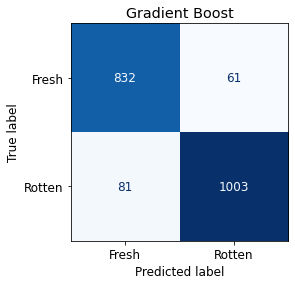

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, gb_poly_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_gb_poly, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('Gradient Boost');
plt.savefig('./images/gb_poly.png')

In [77]:
print(f'Specificity Rate: {(tn / (tn + fp))}')
print(f'Misclassification: {1 - (gs_gb_poly.score(X_test, y_test))}')

Specificity Rate: 0.9316909294512878
Misclassification: 0.07182599898836617


Accuracy of GBC on testing data: 0.9267
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       893
           1       0.94      0.93      0.93      1084

    accuracy                           0.93      1977
   macro avg       0.93      0.93      0.93      1977
weighted avg       0.93      0.93      0.93      1977



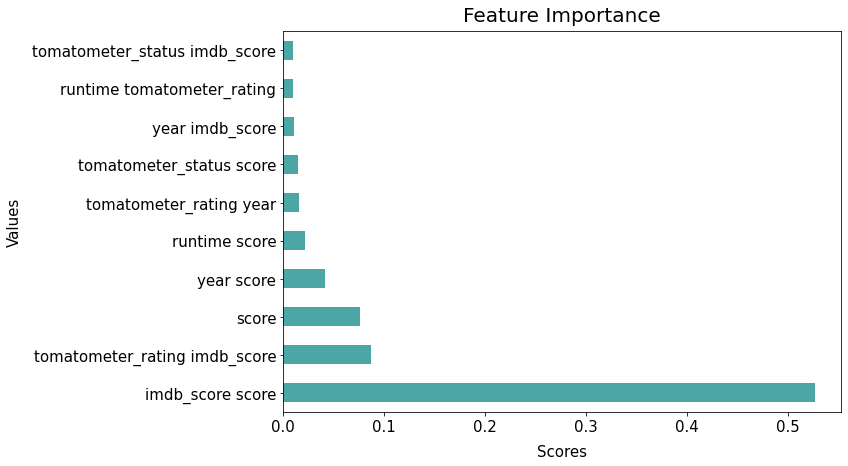

In [78]:
model = GradientBoostingClassifier(learning_rate=0.25, n_estimators=300,
                                    max_depth=5)
model.fit(X_train,y_train)
predictors=list(X_train)
plt.figure(figsize = (10, 7))
imp_features = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
imp_features[:10].plot(kind='barh', title='Importance of Features', color = 'teal', alpha = 0.7)
plt.title('Feature Importance', fontsize = 20, pad  = 10)
plt.ylabel('Values', fontsize = 15, labelpad = 10)
plt.yticks(size = 15)
plt.xlabel('Scores', fontsize = 15, labelpad = 10)
plt.xticks(size = 15)
print('Accuracy of GBC on testing data: {:.4f}'.format(model.score(X_test, y_test)))
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

plt.savefig('./images/imp_of_features.png',dpi=300, bbox_inches = "tight")

### Bagging Classifier

In [79]:
count = 0 
bag_poly_params = {}

In [80]:
start = time.time()
bag_poly_params = bag_poly_params
count = count

params = {
    'n_estimators' : [70,80],
    'bootstrap' : [True, False],
    'max_features' : [0.20, 0.25, 0.45, 0.35]}

gs_bag_poly = GridSearchCV(BaggingClassifier(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)

gs_bag_poly.fit(X_train, y_train)
count += 1

gs_bag_poly.best_params_['score'] = gs_bag_poly.best_score_ 
gs_bag_poly.best_params_['train_score'] = gs_bag_poly.score(X_train, y_train)
gs_bag_poly.best_params_['test_score'] = gs_bag_poly.score(X_test, y_test)

bag_poly_preds = gs_bag_poly.predict(X_test)

gs_bag_poly.best_params_['recall']  = recall_score(y_test, bag_poly_preds)
gs_bag_poly.best_params_['precision'] = precision_score(y_test, bag_poly_preds)
gs_bag_poly.best_params_['f1_score'] = f1_score(y_test, bag_poly_preds)

bag_poly_params[f'bag_poly_{count}'] = gs_bag_poly.best_params_   

bag_poly_df = pd.DataFrame.from_dict(bag_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

bag_poly_df

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime is 646.8216712474823


,bootstrap,max_features,n_estimators,score,train_score,test_score,recall,precision,f1_score
bag_poly_1,False,0.45,80,0.919089,1.0,0.919575,0.918819,0.933458,0.926081


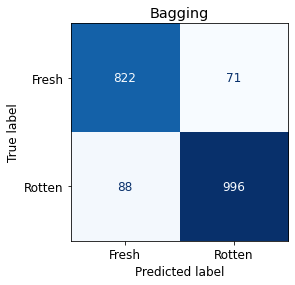

In [81]:
tn, fp, fn, tp = confusion_matrix(y_test, bag_poly_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_bag_poly, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('Bagging');
plt.savefig('./images/bag_poly.png')

In [82]:
print(f'Specificity Rate: {(tn / (tn + fp))}')
print(f'Misclassification: {1 - (gs_bag_poly.score(X_test, y_test))}')

Specificity Rate: 0.9204927211646137
Misclassification: 0.08042488619119881


### Ada Boost

In [83]:
count = 0 
ada_poly_params = {}

In [84]:
start = time.time()
ada_poly_params = ada_poly_params
count = count

params = {
    'n_estimators' : [5, 15, 20,],
    'learning_rate' : [.001, .0001, 0.00001]}

gs_ada_poly = GridSearchCV(AdaBoostClassifier(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)

gs_ada_poly.fit(X_train, y_train)
count += 1

gs_ada_poly.best_params_['score'] = gs_ada_poly.best_score_ 
gs_ada_poly.best_params_['train_score'] = gs_ada_poly.score(X_train, y_train)
gs_ada_poly.best_params_['test_score'] = gs_ada_poly.score(X_test, y_test)

ada_poly_preds = gs_ada_poly.predict(X_test)

gs_ada_poly.best_params_['recall']  = recall_score(y_test, ada_poly_preds)
gs_ada_poly.best_params_['precision'] = precision_score(y_test, ada_poly_preds)
gs_ada_poly.best_params_['f1_score'] = f1_score(y_test, ada_poly_preds)

ada_poly_params[f'ada_poly_{count}'] = gs_ada_poly.best_params_   

ada_poly_df = pd.DataFrame.from_dict(ada_poly_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

ada_poly_df

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 22.12536311149597


,learning_rate,n_estimators,score,train_score,test_score,recall,precision,f1_score
ada_poly_1,0.001,5,0.84577,0.847939,0.844714,0.762915,0.942987,0.843447


In [88]:
master = pd.concat([nb_poly_df, rf_poly_df, svc_poly_df, lr_poly_df, dt_poly_df, 
                    ada_poly_df, gb_poly_df, bag_poly_df], join = 'outer' )
master.sort_values(by = 'test_score', ascending = False)

,alpha,score,train_score,test_score,recall,precision,f1_score,bootstrap,ccp_alpha,max_depth,max_features,n_estimators,svc__C,svc__degree,svc__kernel,lr__C,lr__max_iter,lr__penalty,lr__solver,lr__tol,criterion,min_samples_leaf,min_samples_split,learning_rate
gb_poly_1,NaN,0.916055,1.000000,0.928174,0.925277,0.942669,0.933892,NaN,NaN,5.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250
bag_poly_1,NaN,0.919089,1.000000,0.919575,0.918819,0.933458,0.926081,False,NaN,NaN,0.45,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dt_poly_1,NaN,0.888069,0.932755,0.880121,0.881919,0.897653,0.889716,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gini,6.0,20.0,NaN
rf_poly_1,NaN,0.862475,0.895228,0.865959,0.845018,0.904245,0.873629,False,0.0,6.0,sqrt,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr_poly_1,NaN,0.824948,0.931670,0.853819,0.834871,0.891626,0.862315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5000.0,l2,saga,0.1,NaN,NaN,NaN,NaN
ada_poly_1,NaN,0.845770,0.847939,0.844714,0.762915,0.942987,0.843447,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001
svc_poly_1,NaN,0.771153,0.999566,0.779464,0.734317,0.843220,0.785010,NaN,NaN,NaN,NaN,NaN,3.0,3.0,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_poly_1,0.5,0.745987,0.756833,0.751644,0.753690,0.784822,0.768941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Gradient Boosting model here is the best performing with a test acccuracy score of 0.928. Testing Neural Networks before concluding

Modeling with Neural Networks can be found in 04.3_Classification_Modeling_NN.ipynb